#Scraping Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Merge Data

In [ ]:
asumsico_data = pd.read_csv('/content/dataset_asumsico.csv')
bisniscom_data = pd.read_csv('/content/dataset_bisniscom.csv')
folkative_data = pd.read_csv('/content/dataset_folkative.csv')
jogdaily_data = pd.read_csv('/content/dataset_jogdaily.csv')
katadata_data = pd.read_csv('/content/dataset_katadata.csv')
kepri_data = pd.read_csv('/content/dataset_kepri.csv')
pacitanku_data = pd.read_csv('/content/dataset_pacitanku.csv')
seputaranlpk_data = pd.read_csv('/content/dataset_seputaranplk.csv')

In [ ]:
merged_df = pd.concat([asumsico_data, bisniscom_data, folkative_data, jogdaily_data, katadata_data, kepri_data, pacitanku_data, seputaranlpk_data], ignore_index=True)
merged_df = merged_df.iloc[:, 1:]
merged_df.to_csv('dataset_fp.csv', index = False)

In [ ]:
data = pd.read_csv('/content/dataset_fp.csv')

data

,account,username,text
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak"
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...
...,...,...,...
2549,seputaranplk,elvinaseprianata,Tidak bisa memenuhi standar gizi 😢
2550,seputaranplk,liamarselina,Di kalteng aja 15 ribuan bapak.. belom ditamba...
2551,seputaranplk,genbi_channel,👏👏👏👏
2552,seputaranplk,lokerjobstreetkh,Makan siang menghindari stunting


#Preprocess Data (Awal)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Analyst/FP Data Mining/dataset_fp.csv')

In [ ]:
data = pd.read_csv('/content/dataset_fp.csv')

In [ ]:
data.head()

,account,username,text
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak"
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...


In [ ]:
print(data.head(5))
print('----------')
print('Shape: ' , data.shape)
print('----------')
print(data.dtypes)
print('----------')
print(data.describe())
print('----------')
print('Data Null?')
print(data.isnull().sum())

    account       username                                               text
0  asumsico   trinurrendra  Cancel aja pak. Ketimbang uang kepotong jadi 5...
1  asumsico        whyuuyy  ganti saja programnya dengan yang lebih baik, pak
2  asumsico       deje1702     Lebih realistis 1 keluarga 1 sarjana padahal 🥲
3  asumsico    nadiatrisna                 Snack rapat kalian aja ga segitu 😂
4  asumsico  alusia_kristi  Dr pd di realisasikan tp ga kesini ga kesana m...
----------
Shape:  (2554, 3)
----------
account     object
username    object
text        object
dtype: object
----------
          account   username  text
count        2554       2554  2546
unique          8       2512  2468
top     folkative  mirah.ssi     😂
freq         1783          2    25
----------
Data Null?
account     0
username    0
text        8
dtype: int64


In [ ]:
def check_duplicate_rows(data) :
  duplicate_rows = data[data.duplicated(keep=False)]
  return duplicate_rows

duplicate_rows = check_duplicate_rows(data)

if not duplicate_rows.empty:
  print("Baris duplikat ditemukan:")
  print(duplicate_rows)
else:
  print("Tidak ditemukan baris duplikat.")

Baris duplikat ditemukan:
        account     username  \
1381  folkative  adyperdanaa   
1382  folkative  adyperdanaa   

                                                   text  
1381  Ini anggaran pemerintah yaa, ingat klo pemerin...  
1382  Ini anggaran pemerintah yaa, ingat klo pemerin...  


In [ ]:
def remove_duplication(data):
  data.drop_duplicates(subset=['text'], keep='first', inplace=True)
  return data

data = remove_duplication(data)
data.shape

(2469, 3)

In [ ]:
def check_words(data):
  short_reviews = data[data['text'].str.split().str.len() < 3]
  return short_reviews

short_reviews = check_words(data)

if not short_reviews.empty:
  print("Baris dengan review kurang dari 3 kata:")
  print(short_reviews)
else:
  print("Tidak ditemukan baris dengan review kurang dari 3 kata.")

Baris dengan review kurang dari 3 kata:
           account          username                       text
8         asumsico    sulindra_adhya                   Awokawok
14        asumsico        saekhulh__                      Mekso
16        asumsico     pratickogenio                      Prank
23        asumsico       gunturswrdk                    blokkk😂
27        asumsico         marufdoli            mr inconsistent
...            ...               ...                        ...
2453         kepri      samomitoru77              Aamiin ❤️❤️🔥🔥
2494     pacitanku       prastyoajii  Alhamdulilah diperhatikan
2496     pacitanku  _rizky_pamungkas                Bersyukur🙌🔥
2498     pacitanku           tyobios               😂😂😂😂😁😁😁😊😊😊🤭🤭
2547  seputaranplk  pentolgoyeng.pky                       😮😮😮😮

[254 rows x 3 columns]


In [ ]:
def remove_short_reviews(data):
  data = data[data['text'].str.split().str.len() >= 3]
  return data

data = remove_short_reviews(data)
data.shape

(2214, 3)

In [ ]:
data.to_csv('cleaned_data.csv', index=False)

#Convert Bahasa

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Analyst/FP Data Mining/cleaned_data.csv')

In [ ]:
data = pd.read_csv('/content/cleaned_data.csv')
data.head()

,account,username,text
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak"
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...


##Translate Data Text

In [ ]:
!pip install googletrans==3.1.0a0

from googletrans import Translator

translator = Translator()

def translate_to_english(text):
    try:
        translated = translator.translate(text, dest='en')
        return translated.text
    except Exception as e:
        print(f"Translation error: {e}")
        return text

data['convert_text'] = data['text'].apply(translate_to_english)

print(data[['account', 'username', 'text', 'convert_text']].head())

# Menyimpan data dengan kolom baru ke file baru
output_file = 'translated_data.csv'
data.to_csv(output_file, index=False)

print(f"File dengan kolom sentimen berhasil disimpan di {output_file}")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=73eb2d22b85d8befa16729b3d7b80ef867817fd6eb7d38f3de4a5be008d3e6b1
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

In [ ]:
data.head()

,account,username,text,convert_text
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,"Just cancel, sir. Instead of cutting the money..."
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak","just replace the program with a better one, sir"
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,"It's more realistic, 1 family, 1 graduate, act..."
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,Even your meeting snacks aren't that much 😂
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,"Instead of realizing it, but not here, not the..."


#Pelabelan

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Analyst/FP Data Mining/translated_data.csv')
data.head()

,account,username,text,cleaned_text,normalized_text,convert_text
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,cancel aja pak ketimbang uang kepotong jadi rb...,"['sih', 'a', 'n', 'sih', 'e', 'l', ' ', 'a', '...","Just cancel it, sir, instead of losing money t..."
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak",ganti saja programnya dengan yang lebih baik pak,"['enggak', 'a', 'n', 't', 'i', ' ', 'si', 'a',...","Just replace the program with a better one, sir"
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,lebih realistis keluarga sarjana padahal,"['l', 'e', 'b', 'i', 'h', ' ', 'r', 'e', 'a', ...",It's more realistic for a graduate family though
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,snack rapat kalian aja ga segitu,"['si', 'n', 'a', 'sih', 'ke', ' ', 'r', 'a', '...",Your meeting snacks aren't that much
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,dr pd di realisasikan tp ga kesini ga kesana m...,"['di', 'r', ' ', 'p', 'di', ' ', 'di', 'i', ' ...","instead of realizing it, but not here, not the..."


In [ ]:
data = pd.read_csv('/content/translated_data.csv')
data.head()

,account,username,text,convert_text
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,"Just cancel, sir. Instead of cutting the money..."
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak","just replace the program with a better one, sir"
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,"It's more realistic, 1 family, 1 graduate, act..."
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,Even your meeting snacks aren't that much 😂
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,"Instead of realizing it, but not here, not the..."


##Vader

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Fungsi untuk menentukan sentimen
def get_sentiment(review):
    scores = sia.polarity_scores(review)
    # Menggunakan nilai compound untuk menentukan sentimen
    compound_score = scores['compound']
    if compound_score > 0.05:
        return 'positif'
    elif compound_score < -0.05:
        return 'negatif'
    else:
        return 'netral'

data['vader_sentimen'] = data['convert_text'].apply(get_sentiment)
#data = data.drop(columns=['text', 'normalized_text'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
data.head()

,account,username,text,convert_text,vader_sentimen
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,"Just cancel it, sir, instead of losing money t...",negatif
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak","Just replace the program with a better one, sir",positif
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,It's more realistic for a graduate family though,netral
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,Your meeting snacks aren't that much,netral
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,"instead of realizing it, but not here, not the...",negatif


##TextBlob

In [ ]:
!pip install pandas textblob

In [ ]:
from textblob import TextBlob

def get_sentiment(review):
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'positif'
    elif polarity < 0:
        return 'negatif'
    else:
        return 'netral'

data['textblob_sentimen'] = data['convert_text'].apply(get_sentiment)
#data = data.drop(columns=['convert_text'])

#output_file = 'labeled_data.csv'
#data.to_csv(output_file, index=False)

In [ ]:
data.head()

,account,username,text,convert_text,vader_sentimen,textblob_sentimen
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,"Just cancel it, sir, instead of losing money t...",negatif,positif
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak","Just replace the program with a better one, sir",positif,positif
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,It's more realistic for a graduate family though,netral,positif
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,Your meeting snacks aren't that much,netral,positif
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,"instead of realizing it, but not here, not the...",negatif,positif


##Afinn

In [ ]:
!pip install afinn

from afinn import Afinn

afinn = Afinn()

def get_afinn_sentiment(text):
    score = afinn.score(text)
    if score > 0:
        return 'positif'
    elif score < 0:
        return 'negatif'
    else:
        return 'netral'

data['afinn_sentimen'] = data['convert_text'].apply(get_afinn_sentiment)

output_file = 'labeled_data.csv'
data.to_csv(output_file, index=False)

print(data[['account', 'username', 'text', 'vader_sentimen', 'textblob_sentimen', 'afinn_sentimen']].head())
#print(f"File dengan label sentimen berhasil disimpan di {output_file}")

    account       username                                               text  \
0  asumsico   trinurrendra  Cancel aja pak. Ketimbang uang kepotong jadi 5...   
1  asumsico        whyuuyy  ganti saja programnya dengan yang lebih baik, pak   
2  asumsico       deje1702     Lebih realistis 1 keluarga 1 sarjana padahal 🥲   
3  asumsico    nadiatrisna                 Snack rapat kalian aja ga segitu 😂   
4  asumsico  alusia_kristi  Dr pd di realisasikan tp ga kesini ga kesana m...   

  vader_sentimen textblob_sentimen afinn_sentimen  
0        negatif           negatif         netral  
1        positif           positif        positif  
2         netral           positif         netral  
3         netral           positif         netral  
4        negatif           positif        positif  


In [ ]:
data.head()

,account,username,text,convert_text,vader_sentimen,textblob_sentimen,afinn_sentimen
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,"Just cancel, sir. Instead of cutting the money...",negatif,negatif,netral
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak","just replace the program with a better one, sir",positif,positif,positif
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,"It's more realistic, 1 family, 1 graduate, act...",netral,positif,netral
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,Even your meeting snacks aren't that much 😂,netral,positif,netral
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,"Instead of realizing it, but not here, not the...",negatif,positif,positif


##Git Labeling (Hapus)

In [ ]:
import pandas as pd
import requests

positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_words = pd.read_csv(positive_url, sep='\t', header=None, names=['word'])
negative_words = pd.read_csv(negative_url, sep='\t', header=None, names=['word'])

positive_words['sentiment'] = 'positif'
negative_words['sentiment'] = 'negatif'

# Menggabungkan kedua dataset menjadi satu kamus sentimen
sentiment_dict = pd.concat([positive_words, negative_words], ignore_index=True)

# Mengubah DataFrame menjadi dictionary
sentiment_mapping = dict(zip(sentiment_dict['word'], sentiment_dict['sentiment']))

def label_sentiment(text):
    tokens = text.split()
    sentiment_labels = [sentiment_mapping.get(word, 'netral') for word in tokens]
    if 'negatif' in sentiment_labels:
        return 'negatif'
    elif 'positif' in sentiment_labels:
        return 'positif'
    return 'netral'

data['git_sentimen'] = data['text'].apply(label_sentiment)

#output_file = 'labeled_sentiment_output.csv'
#data.to_csv(output_file, index=False)


print(data[['account', 'username', 'text', 'vader_sentimen', 'textblob_sentimen', 'git_sentimen']].head())

#print(f"File dengan label sentimen berhasil disimpan di {output_file}")

    account       username                                               text  \
0  asumsico   trinurrendra  Cancel aja pak. Ketimbang uang kepotong jadi 5...   
1  asumsico        whyuuyy  ganti saja programnya dengan yang lebih baik, pak   
2  asumsico       deje1702     Lebih realistis 1 keluarga 1 sarjana padahal 🥲   
3  asumsico    nadiatrisna                 Snack rapat kalian aja ga segitu 😂   
4  asumsico  alusia_kristi  Dr pd di realisasikan tp ga kesini ga kesana m...   

  vader_sentimen textblob_sentimen git_sentimen  
0         netral           positif       netral  
1        positif           positif       netral  
2         netral           positif      positif  
3         netral           positif       netral  
4        negatif           positif       netral  


In [ ]:
data.head(20)

,account,username,text,vader_sentimen,textblob_sentimen,git_sentimen,afinn_sentimen,sentiwordnet_sentimen,git2_sentimen
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,netral,positif,netral,positif,positif,netral
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak",positif,positif,netral,positif,positif,netral
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,netral,positif,positif,netral,positif,positif
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,netral,positif,netral,netral,netral,netral
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,negatif,positif,netral,positif,positif,netral
5,asumsico,taufik_fatih,Oke gas oke gas 🤣🤣,positif,positif,netral,netral,netral,netral
6,asumsico,novianunuu,"Rakyat mah gakpapa pak, sampe terakhir nasi sa...",positif,positif,netral,positif,positif,netral
7,asumsico,aabdoelkarim,ini dulu program andalan kampanye nya loh ya. ...,negatif,positif,netral,positif,positif,netral
8,asumsico,santosoanaz,nanti mereka rapat coffee breaknya gorengan 10...,positif,netral,positif,positif,negatif,positif
9,asumsico,aliimrnnn,BBM ga jd di turunin pak? Kmren janji kampanye...,positif,netral,netral,positif,negatif,netral


##SentiWordNet (Hapus)

In [ ]:
!pip install sentiwordnet

from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def sentiwordnet_sentiment(text):
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    sentiment_score = 0
    for lemma in lemmas:
        synsets = list(swn.senti_synsets(lemma))
        if synsets:
            synset = synsets[0]
            sentiment_score += synset.pos_score() - synset.neg_score()
    if sentiment_score > 0.1:
        return 'positif'
    elif sentiment_score < -0.1:
        return 'negatif'
    else:
        return 'netral'

data['sentiwordnet_sentimen'] = data['convert_text'].apply(sentiwordnet_sentiment)
data = data.drop(columns=['convert_text'])

output_file = 'netral_labeled_data.csv'
data.to_csv(output_file, index=False)

print(data[['account', 'username', 'text', 'vader_sentimen', 'textblob_sentimen', 'git_sentimen', 'afinn_sentimen', 'sentiwordnet_sentimen']].head())
print(f"File dengan label sentimen berhasil disimpan di {output_file}")

ERROR: Could not find a version that satisfies the requirement sentiwordnet (from versions: none)
ERROR: No matching distribution found for sentiwordnet


[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


    account       username                                               text  \
0  asumsico   trinurrendra  Cancel aja pak. Ketimbang uang kepotong jadi 5...   
1  asumsico        whyuuyy  ganti saja programnya dengan yang lebih baik, pak   
2  asumsico       deje1702     Lebih realistis 1 keluarga 1 sarjana padahal 🥲   
3  asumsico    nadiatrisna                 Snack rapat kalian aja ga segitu 😂   
4  asumsico  alusia_kristi  Dr pd di realisasikan tp ga kesini ga kesana m...   

  vader_sentimen textblob_sentimen git_sentimen afinn_sentimen  \
0         netral           positif       netral        positif   
1        positif           positif       netral        positif   
2         netral           positif      positif         netral   
3         netral           positif       netral         netral   
4        negatif           positif       netral        positif   

  sentiwordnet_sentimen  
0               positif  
1               positif  
2               positif  
3           

#Visualisasi Distribusi Data

In [ ]:
data = pd.read_csv('/content/labeled_data.csv')
data.head()

,account,username,text,convert_text,vader_sentimen,textblob_sentimen,afinn_sentimen
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,"Just cancel, sir. Instead of cutting the money...",negatif,negatif,netral
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak","just replace the program with a better one, sir",positif,positif,positif
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,"It's more realistic, 1 family, 1 graduate, act...",netral,positif,netral
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,Even your meeting snacks aren't that much 😂,netral,positif,netral
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,"Instead of realizing it, but not here, not the...",negatif,positif,positif


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Analyst/FP Data Mining/labeled_data.csv')
data.head(20)

,account,username,text,vader_sentimen,textblob_sentimen,afinn_sentimen
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,netral,positif,positif
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak",positif,positif,positif
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,netral,positif,netral
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,netral,positif,netral
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,negatif,positif,positif
5,asumsico,taufik_fatih,Oke gas oke gas 🤣🤣,positif,positif,netral
6,asumsico,novianunuu,"Rakyat mah gakpapa pak, sampe terakhir nasi sa...",positif,positif,positif
7,asumsico,aabdoelkarim,ini dulu program andalan kampanye nya loh ya. ...,negatif,positif,positif
8,asumsico,santosoanaz,nanti mereka rapat coffee breaknya gorengan 10...,positif,netral,positif
9,asumsico,aliimrnnn,BBM ga jd di turunin pak? Kmren janji kampanye...,positif,netral,positif


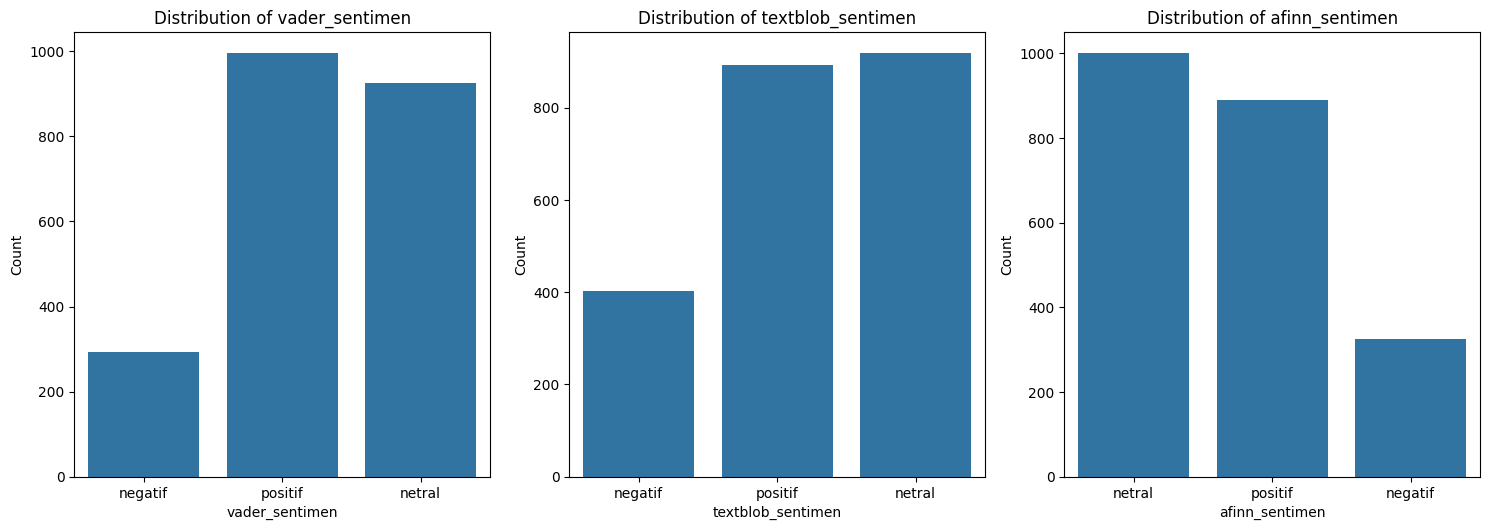

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_columns = ['vader_sentimen', 'textblob_sentimen', 'afinn_sentimen']

plt.figure(figsize=(15, 10))

for i, col in enumerate(sentiment_columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
vader_negative_count = data[data['vader_sentimen'] == 'negatif'].shape[0]
vader_positive_count = data[data['vader_sentimen'] == 'positif'].shape[0]
vader_netral_count = data[data['vader_sentimen'] == 'netral'].shape[0]

textblob_negative_count = data[data['textblob_sentimen'] == 'negatif'].shape[0]
textblob_positive_count = data[data['textblob_sentimen'] == 'positif'].shape[0]
textblob_netral_count = data[data['textblob_sentimen'] == 'netral'].shape[0]

afinn_negative_count = data[data['afinn_sentimen'] == 'negatif'].shape[0]
afinn_positive_count = data[data['afinn_sentimen'] == 'positif'].shape[0]
afinn_netral_count = data[data['afinn_sentimen'] == 'netral'].shape[0]

print("Vader Sentiment Counts:")
print(f"  Negative: {vader_negative_count}")
print(f"  Positive: {vader_positive_count}")
print(f"  Netral: {vader_netral_count}")

print("\nTextBlob Sentiment Counts:")
print(f"  Negative: {textblob_negative_count}")
print(f"  Positive: {textblob_positive_count}")
print(f"  Netral: {textblob_netral_count}")

print("\nAfinn Sentiment Counts:")
print(f"  Negative: {afinn_negative_count}")
print(f"  Positive: {afinn_positive_count}")
print(f"  Netral: {afinn_netral_count}")

Vader Sentiment Counts:
  Negative: 293
  Positive: 996
  Netral: 925

TextBlob Sentiment Counts:
  Negative: 403
  Positive: 893
  Netral: 918

Afinn Sentiment Counts:
  Negative: 324
  Positive: 890
  Netral: 1000


#Pengambilan Nilai Dominan

In [ ]:
import pandas as pd
from collections import Counter

def get_final_sentiment(row):
    sentiments = [row['vader_sentimen'], row['textblob_sentimen'], row['afinn_sentimen']]
    sentiment_counts = Counter(sentiments)  # Hitung frekuensi masing-masing sentimen
    most_common_sentiment = sentiment_counts.most_common(1)[0]  # Ambil sentimen dominan

    # Jika mayoritas sentimen muncul dua kali atau lebih
    if most_common_sentiment[1] >= 2:
        return most_common_sentiment[0]
    return 'equal'

data['final_sentiment'] = data.apply(get_final_sentiment, axis=1)

data = data.drop(columns=['vader_sentimen', 'textblob_sentimen', 'afinn_sentimen', 'convert_text'])
output_file = 'final_sentiment_data.csv'
data.to_csv(output_file, index=False)

print(data[['account', 'username', 'text', 'final_sentiment']].head())
print(f"Data dengan sentimen final disimpan di {output_file}")

    account       username                                               text  \
0  asumsico   trinurrendra  Cancel aja pak. Ketimbang uang kepotong jadi 5...   
1  asumsico        whyuuyy  ganti saja programnya dengan yang lebih baik, pak   
2  asumsico       deje1702     Lebih realistis 1 keluarga 1 sarjana padahal 🥲   
3  asumsico    nadiatrisna                 Snack rapat kalian aja ga segitu 😂   
4  asumsico  alusia_kristi  Dr pd di realisasikan tp ga kesini ga kesana m...   

  final_sentiment  
0         negatif  
1         positif  
2          netral  
3          netral  
4         positif  
Data dengan sentimen final disimpan di final_sentiment_data.csv


#Eksplorasi Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/final_sentiment_data.csv')
data.head()

,account,username,text,final_sentiment
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,negatif
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak",positif
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,netral
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,netral
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,positif


#Pengecekan Distribusi Sumber Data

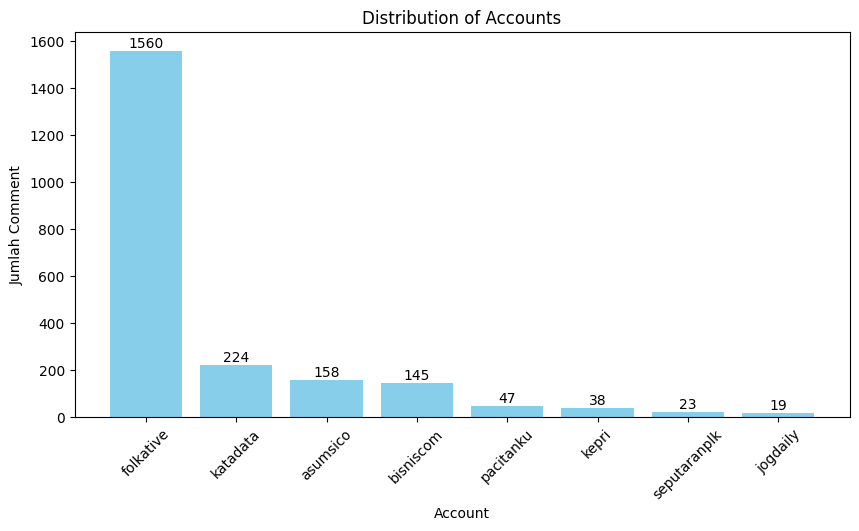

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sentiment_counts = data['account'].value_counts()
account = sentiment_counts.index

plt.figure(figsize=(10, 5))
bars = plt.bar(account, sentiment_counts, color='skyblue')
plt.title("Distribution of Accounts")
plt.xlabel("Account")
plt.ylabel("Jumlah Comment")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

##Pengecekan Distribusi Kelas

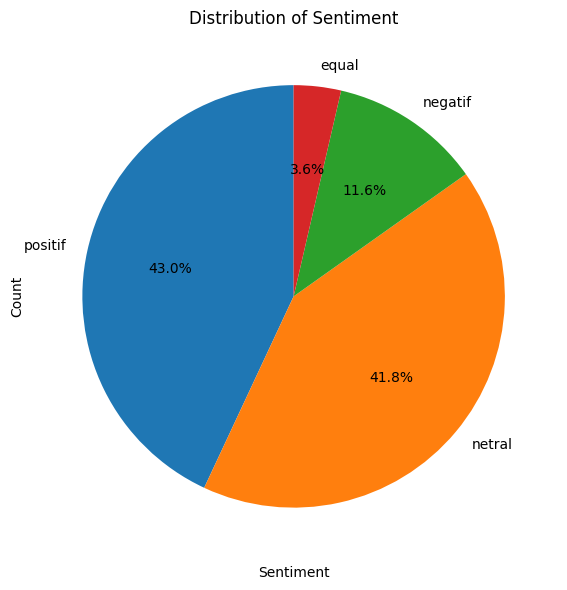

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sentiment_counts = data['final_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', color=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightgrey'], autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

##Pengecekan Kata yang Paling Banyak Muncul

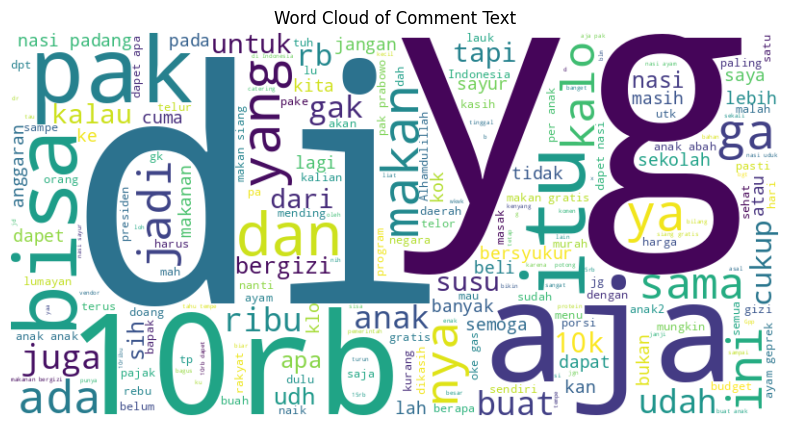

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['text']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comment Text')
plt.show()

#Preprocessing

In [ ]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv('/content/final_sentiment_data.csv')
data.head()

,account,username,text,final_sentiment
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,negatif
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak",positif
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,netral
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,netral
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,positif


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Analyst/FP Data Mining/final_sentiment_data.csv')
data.head()

,account,username,text,final_sentiment
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,positif
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak",positif
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,netral
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,netral
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,positif


##Text Cleaning

In [ ]:
def clean_text(text):
  text = text.lower()  # Mengubah teks menjadi huruf kecil
  text = re.sub(r'[^a-zA-Z\s]', '', text)  # Menghapus karakter khusus dan angka
  text = re.sub(r'[^\w\s]', '', text) # Menghapus karakter non-alphanumeric dan whitespace
  text = re.sub(r'\s+', ' ', text).strip()  # Menghapus whitespace ekstra
  return text

data['cleaned_text'] = data['text'].apply(clean_text)

comparison_df = data[['account', 'username', 'text', 'cleaned_text', 'final_sentiment']]
print(comparison_df.head(10))

#comparison_df.to_csv('cleaned_comparison.csv', index=False)

    account       username                                               text  \
0  asumsico   trinurrendra  Cancel aja pak. Ketimbang uang kepotong jadi 5...   
1  asumsico        whyuuyy  ganti saja programnya dengan yang lebih baik, pak   
2  asumsico       deje1702     Lebih realistis 1 keluarga 1 sarjana padahal 🥲   
3  asumsico    nadiatrisna                 Snack rapat kalian aja ga segitu 😂   
4  asumsico  alusia_kristi  Dr pd di realisasikan tp ga kesini ga kesana m...   
5  asumsico   taufik_fatih                                 Oke gas oke gas 🤣🤣   
6  asumsico     novianunuu  Rakyat mah gakpapa pak, sampe terakhir nasi sa...   
7  asumsico   aabdoelkarim  ini dulu program andalan kampanye nya loh ya. ...   
8  asumsico    santosoanaz  nanti mereka rapat coffee breaknya gorengan 10...   
9  asumsico      aliimrnnn  BBM ga jd di turunin pak? Kmren janji kampanye...   

                                        cleaned_text final_sentiment  
0  cancel aja pak ketimbang uang kepo

##Tokenisasi

In [ ]:
def tokenize_text(text):
  return word_tokenize(text)

data['tokenized_text'] = data['cleaned_text'].apply(tokenize_text)

comparison_tokenized_df = data[['account', 'username', 'text', 'tokenized_text', 'final_sentiment']]
print(comparison_tokenized_df.head(10))

#comparison_tokenized_df.to_csv('tokenized_comparison.csv', index=False)

    account       username                                               text  \
0  asumsico   trinurrendra  Cancel aja pak. Ketimbang uang kepotong jadi 5...   
1  asumsico        whyuuyy  ganti saja programnya dengan yang lebih baik, pak   
2  asumsico       deje1702     Lebih realistis 1 keluarga 1 sarjana padahal 🥲   
3  asumsico    nadiatrisna                 Snack rapat kalian aja ga segitu 😂   
4  asumsico  alusia_kristi  Dr pd di realisasikan tp ga kesini ga kesana m...   
5  asumsico   taufik_fatih                                 Oke gas oke gas 🤣🤣   
6  asumsico     novianunuu  Rakyat mah gakpapa pak, sampe terakhir nasi sa...   
7  asumsico   aabdoelkarim  ini dulu program andalan kampanye nya loh ya. ...   
8  asumsico    santosoanaz  nanti mereka rapat coffee breaknya gorengan 10...   
9  asumsico      aliimrnnn  BBM ga jd di turunin pak? Kmren janji kampanye...   

                                      tokenized_text final_sentiment  
0  [cancel, aja, pak, ketimbang, uang

##Normalisasi

In [ ]:
normalizad_word = pd.read_csv('/content/drive/MyDrive/Data Analyst/FP Data Mining/kamusalay.csv', header=None)  # Memuat kamus alay (file .csv kamus normalisasi)
normalizad_word_dict = {row[0]: row[1] for _, row in normalizad_word.iterrows()}  # Membuat kamus normalisasi dari csv

def normalize_term(tokens):
    return [normalizad_word_dict.get(term, term) for term in tokens]  # Jika term ada di kamus, normalisasikan, jika tidak tetap

data['normalized_text'] = data['tokenized_text'].apply(normalize_term)

comparison_normalization_df = data[['account', 'username', 'text', 'normalized_text', 'final_sentiment']]
print(comparison_normalization_df.head(10))

#comparison_normalization_df.to_csv('normalized_comparison.csv', index=False)

    account       username                                               text  \
0  asumsico   trinurrendra  Cancel aja pak. Ketimbang uang kepotong jadi 5...   
1  asumsico        whyuuyy  ganti saja programnya dengan yang lebih baik, pak   
2  asumsico       deje1702     Lebih realistis 1 keluarga 1 sarjana padahal 🥲   
3  asumsico    nadiatrisna                 Snack rapat kalian aja ga segitu 😂   
4  asumsico  alusia_kristi  Dr pd di realisasikan tp ga kesini ga kesana m...   
5  asumsico   taufik_fatih                                 Oke gas oke gas 🤣🤣   
6  asumsico     novianunuu  Rakyat mah gakpapa pak, sampe terakhir nasi sa...   
7  asumsico   aabdoelkarim  ini dulu program andalan kampanye nya loh ya. ...   
8  asumsico    santosoanaz  nanti mereka rapat coffee breaknya gorengan 10...   
9  asumsico      aliimrnnn  BBM ga jd di turunin pak? Kmren janji kampanye...   

                                     normalized_text final_sentiment  
0  [cancel, saja, pak, ketimbang, uan

##Stopword Removal

In [ ]:
stop_words = set(stopwords.words('indonesian')) #menghapus kata yang tidak memberikan informasi signifikan (ini, itu, dll)

def remove_stopwords(tokens):
  filtered_tokens = [token for token in tokens if token not in stop_words]
  return filtered_tokens

data['filtered_text'] = data['normalized_text'].apply(remove_stopwords)

comparison_stopwords_df = data[['account', 'username', 'text', 'normalized_text', 'filtered_text', 'final_sentiment']]
print(comparison_stopwords_df.head(10))

#comparison_stopwords_df.to_csv('stopwords_removal_comparison.csv', index=False)

    account       username                                               text  \
0  asumsico   trinurrendra  Cancel aja pak. Ketimbang uang kepotong jadi 5...   
1  asumsico        whyuuyy  ganti saja programnya dengan yang lebih baik, pak   
2  asumsico       deje1702     Lebih realistis 1 keluarga 1 sarjana padahal 🥲   
3  asumsico    nadiatrisna                 Snack rapat kalian aja ga segitu 😂   
4  asumsico  alusia_kristi  Dr pd di realisasikan tp ga kesini ga kesana m...   
5  asumsico   taufik_fatih                                 Oke gas oke gas 🤣🤣   
6  asumsico     novianunuu  Rakyat mah gakpapa pak, sampe terakhir nasi sa...   
7  asumsico   aabdoelkarim  ini dulu program andalan kampanye nya loh ya. ...   
8  asumsico    santosoanaz  nanti mereka rapat coffee breaknya gorengan 10...   
9  asumsico      aliimrnnn  BBM ga jd di turunin pak? Kmren janji kampanye...   

                                     normalized_text  \
0  [cancel, saja, pak, ketimbang, uang, kepotong,...

##Stemming

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_text(tokens):
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  return stemmed_tokens

data['stemmed_text'] = data['filtered_text'].apply(stemming_text)

comparison_stemming_df = data[['account', 'username', 'text', 'normalized_text', 'filtered_text', 'stemmed_text', 'final_sentiment']]
print(comparison_stemming_df.head(10))

comparison_stemming_df.to_csv('stemming_comparison.csv', index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00
    account       username                                               text  \
0  asumsico   trinurrendra  Cancel aja pak. Ketimbang uang kepotong jadi 5...   
1  asumsico        whyuuyy  ganti saja programnya dengan yang lebih baik, pak   
2  asumsico       deje1702     Lebih realistis 1 keluarga 1 sarjana padahal 🥲   
3  asumsico    nadiatrisna                 Snack rapat kalian aja ga segitu 😂   
4  asumsico  alusia_kristi  Dr pd di realisasikan tp ga kesini ga kesana m...   
5  asumsico   taufik_fatih                                 Oke gas oke gas 🤣🤣   
6  asumsico     novianunuu  Rakyat mah gakpapa pak, sampe terakhir nasi sa...   
7  asumsico   aabdoelkarim  ini dulu program andalan kampanye nya loh ya. ...   
8  asumsico    santosoanaz  nanti mereka rapat coffee breaknya gorengan 10...   
9  asumsico      aliimrnnn  BBM ga jd di turunin pak? Kmren janji kampanye...   

                            

In [ ]:
data = pd.read_csv('/content/stemming_comparison.csv')
data.rename(columns={'stemmed_text': 'preprocessed_text'}, inplace=True)
data = data.drop(columns=['normalized_text', 'filtered_text'])
data.head(20)

,account,username,text,preprocessed_text,final_sentiment
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,"['cancel', 'ketimbang', 'uang', 'potong', 'rib...",negatif
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak","['ganti', 'program']",positif
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,"['realistis', 'keluarga', 'sarjana']",netral
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,"['snack', 'rapat', 'segitu']",netral
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,"['realisasi', 'kesini', 'kesana', 'mending', '...",positif
5,asumsico,taufik_fatih,Oke gas oke gas 🤣🤣,"['oke', 'gas', 'oke', 'gas']",positif
6,asumsico,novianunuu,"Rakyat mah gakpapa pak, sampe terakhir nasi sa...","['rakyat', 'mah', 'enggak apa', 'nasi', 'garem...",positif
7,asumsico,aabdoelkarim,ini dulu program andalan kampanye nya loh ya. ...,"['program', 'andal', 'kampanye', 'nya', 'loh',...",positif
8,asumsico,santosoanaz,nanti mereka rapat coffee breaknya gorengan 10...,"['rapat', 'coffee', 'breaknya', 'goreng', 'rib...",positif
9,asumsico,aliimrnnn,BBM ga jd di turunin pak? Kmren janji kampanye...,"['bbm', 'turunin', 'kemarin', 'janji', 'kampan...",positif


In [ ]:
data = data.to_csv('final_dataset.csv', index=False)

AttributeError: 'NoneType' object has no attribute 'to_csv'

#Resampling dan Splitting Data

In [ ]:
data = pd.read_csv('/content/final_dataset.csv')
data.head()

,account,username,text,preprocessed_text,final_sentiment
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,"['cancel', 'ketimbang', 'uang', 'potong', 'rib...",negatif
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak","['ganti', 'program']",positif
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,"['realistis', 'keluarga', 'sarjana']",netral
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,"['snack', 'rapat', 'segitu']",netral
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,"['realisasi', 'kesini', 'kesana', 'mending', '...",positif


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Data Analyst/FP Data Mining/final_dataset.csv')
data.head()

,account,username,text,preprocessed_text,final_sentiment
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,"['cancel', 'ketimbang', 'uang', 'potong', 'rib...",negatif
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak","['ganti', 'program']",positif
2,asumsico,deje1702,Lebih realistis 1 keluarga 1 sarjana padahal 🥲,"['realistis', 'keluarga', 'sarjana']",netral
3,asumsico,nadiatrisna,Snack rapat kalian aja ga segitu 😂,"['snack', 'rapat', 'segitu']",netral
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,"['realisasi', 'kesini', 'kesana', 'mending', '...",positif


In [ ]:
data = data[data['final_sentiment'] != 'netral']
data = data[data['final_sentiment'] != 'equal']
data

final_sentiment_counts = data['final_sentiment'].value_counts()
final_sentiment_counts

,count
final_sentiment,
positif,953
negatif,256


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

##80:20


###Splitting Data

In [ ]:
train_data_80, test_data_20 = train_test_split(
    data, test_size=0.2, random_state=42, stratify=data['final_sentiment'] #Menjaga distribusi label kelas
    )

In [ ]:
data.head()

,account,username,text,preprocessed_text,final_sentiment
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,"['cancel', 'ketimbang', 'uang', 'potong', 'rib...",negatif
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak","['ganti', 'program']",positif
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,"['realisasi', 'kesini', 'kesana', 'mending', '...",positif
5,asumsico,taufik_fatih,Oke gas oke gas 🤣🤣,"['oke', 'gas', 'oke', 'gas']",positif
6,asumsico,novianunuu,"Rakyat mah gakpapa pak, sampe terakhir nasi sa...","['rakyat', 'mah', 'enggak apa', 'nasi', 'garem...",positif


###Resampling

In [ ]:
#Random Under Sampling
us_80 = RandomUnderSampler(random_state=42)
train_features_us_80, train_labels_us_80 = us_80.fit_resample(
    train_data_80[['preprocessed_text']], train_data_80['final_sentiment']
    )

#Random Over Sampling
os_80 = RandomOverSampler(random_state=42)
train_features_os_80, train_labels_os_80 = os_80.fit_resample(
    train_data_80[['preprocessed_text']], train_data_80['final_sentiment']
    )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


###70:30

In [ ]:
train_data_70, test_data_30 = train_test_split(
    data, test_size=0.3, random_state=42, stratify=data['final_sentiment'] #Menjaga distribusi label kelas
    )

data.head()

,account,username,text,preprocessed_text,final_sentiment
0,asumsico,trinurrendra,Cancel aja pak. Ketimbang uang kepotong jadi 5...,"['cancel', 'ketimbang', 'uang', 'potong', 'rib...",negatif
1,asumsico,whyuuyy,"ganti saja programnya dengan yang lebih baik, pak","['ganti', 'program']",positif
4,asumsico,alusia_kristi,Dr pd di realisasikan tp ga kesini ga kesana m...,"['realisasi', 'kesini', 'kesana', 'mending', '...",positif
5,asumsico,taufik_fatih,Oke gas oke gas 🤣🤣,"['oke', 'gas', 'oke', 'gas']",positif
6,asumsico,novianunuu,"Rakyat mah gakpapa pak, sampe terakhir nasi sa...","['rakyat', 'mah', 'enggak apa', 'nasi', 'garem...",positif


###Resampling

In [ ]:
#Random Under Sampling
us_70 = RandomUnderSampler(random_state=42)
train_features_us_70, train_labels_us_70 = us_70.fit_resample(
    train_data_70[['preprocessed_text']], train_data_70['final_sentiment']
    )

#Random Over Sampling
os_70 = RandomOverSampler(random_state=42)
train_features_os_70, train_labels_os_70 = os_70.fit_resample(
    train_data_70[['preprocessed_text']], train_data_70['final_sentiment']
    )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


##Hasil

In [ ]:
print("Splitting 80:20:")
print(f"Train Data Shape (80%): {train_data_80.shape}")
print(f"Test Data Shape (20%): {test_data_20.shape}")
print(f"Train Features US Shape (80:20): {train_features_us_80.shape}")
print(f"Train Labels US Shape (80:20): {train_labels_us_80.shape}")
print(f"Train Features OS Shape (80:20): {train_features_os_80.shape}")
print(f"Train Labels OS Shape (80:20): {train_labels_os_80.shape}")

print("\nSplitting 70:30:")
print(f"Train Data Shape (70%): {train_data_70.shape}")
print(f"Test Data Shape (30%): {test_data_30.shape}")
print(f"Train Features US Shape (70:30): {train_features_us_70.shape}")
print(f"Train Labels US Shape (70:30): {train_labels_us_70.shape}")
print(f"Train Features OS Shape (70:30): {train_features_os_70.shape}")
print(f"Train Labels OS Shape (70:30): {train_labels_os_70.shape}")

Splitting 80:20:
Train Data Shape (80%): (967, 5)
Test Data Shape (20%): (242, 5)
Train Features US Shape (80:20): (410, 1)
Train Labels US Shape (80:20): (410,)
Train Features OS Shape (80:20): (1524, 1)
Train Labels OS Shape (80:20): (1524,)

Splitting 70:30:
Train Data Shape (70%): (846, 5)
Test Data Shape (30%): (363, 5)
Train Features US Shape (70:30): (358, 1)
Train Labels US Shape (70:30): (358,)
Train Features OS Shape (70:30): (1334, 1)
Train Labels OS Shape (70:30): (1334,)


#Term Weighting (TF-IDF)
Note: kolom preprocessed masih berupa list

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Mengubah kolom preprocessed menjadi string
def convert_list_to_string(dataframe, column_name):
    dataframe[column_name] = dataframe[column_name].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
    return dataframe

#Convert kolom preprocessed_text
train_data_80 = convert_list_to_string(train_data_80, 'preprocessed_text')
test_data_20 = convert_list_to_string(test_data_20, 'preprocessed_text')

train_data_70 = convert_list_to_string(train_data_70, 'preprocessed_text')
test_data_30 = convert_list_to_string(test_data_30, 'preprocessed_text')

train_features_os_80 = convert_list_to_string(train_features_os_80, 'preprocessed_text') #oversampling
train_features_us_80 = convert_list_to_string(train_features_us_80, 'preprocessed_text') #undersampling

train_features_os_70 = convert_list_to_string(train_features_os_70, 'preprocessed_text')
train_features_us_70 = convert_list_to_string(train_features_us_70, 'preprocessed_text')

##80:20

In [ ]:
#Normal
tfidf_vectorizer_normal_80 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_features_normal_80 = tfidf_vectorizer_normal_80.fit_transform(train_data_80['preprocessed_text']) #data train
tfidf_features_test_normal_80 = tfidf_vectorizer_normal_80.transform(test_data_20['preprocessed_text']) #data test

#Random Under Sampling
tfidf_vectorizer_us_80 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_features_us_80 = tfidf_vectorizer_us_80.fit_transform(train_features_us_80['preprocessed_text'])
tfidf_features_test_us_80 = tfidf_vectorizer_us_80.transform(test_data_20['preprocessed_text'])

#Random Over Sampling
tfidf_vectorizer_os_80 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_features_os_80 = tfidf_vectorizer_os_80.fit_transform(train_features_os_80['preprocessed_text'])
tfidf_features_test_os_80 = tfidf_vectorizer_os_80.transform(test_data_20['preprocessed_text'])

##70:30

In [ ]:
#Normal
tfidf_vectorizer_normal_70 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_features_normal_70 = tfidf_vectorizer_normal_70.fit_transform(train_data_70['preprocessed_text'])
tfidf_features_test_normal_70 = tfidf_vectorizer_normal_70.transform(test_data_30['preprocessed_text'])

#Random Under Sampling
tfidf_vectorizer_us_70 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_features_us_70 = tfidf_vectorizer_us_70.fit_transform(train_features_us_70['preprocessed_text'])
tfidf_features_test_us_70 = tfidf_vectorizer_us_70.transform(test_data_30['preprocessed_text'])

#Random Over Sampling
tfidf_vectorizer_os_70 = TfidfVectorizer(ngram_range=(1, 2))
tfidf_features_os_70 = tfidf_vectorizer_os_70.fit_transform(train_features_os_70['preprocessed_text'])
tfidf_features_test_os_70 = tfidf_vectorizer_os_70.transform(test_data_30['preprocessed_text'])

##Aplikasi SMOTE

In [ ]:
#Splitting 80:20
smote_80 = SMOTE(random_state=42)
tfidf_features_smote_80, labels_smote_80 = smote_80.fit_resample(
    tfidf_features_normal_80, train_data_80['final_sentiment']
)

#Splitting 70:30
smote_70 = SMOTE(random_state=42)
tfidf_features_smote_70, labels_smote_70 = smote_70.fit_resample(
    tfidf_features_normal_70, train_data_70['final_sentiment']
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validatio

##Hasil

In [ ]:
print("TF-IDF Feature Extraction Complete.")
print(f"Normal 80:20 - Train Features: {tfidf_features_normal_80.shape}, Test Features: {tfidf_features_test_normal_80.shape}")
print(f"Normal 70:30 - Train Features: {tfidf_features_normal_70.shape}, Test Features: {tfidf_features_test_normal_70.shape}")
print(f"Under Sampling 80:20 - Train Features: {tfidf_features_us_80.shape}, Test Features: {tfidf_features_test_us_80.shape}")
print(f"Under Sampling 70:30 - Train Features: {tfidf_features_us_70.shape}, Test Features: {tfidf_features_test_us_70.shape}")
print(f"Over Sampling 80:20 - Train Features: {tfidf_features_os_80.shape}, Test Features: {tfidf_features_test_os_80.shape}")
print(f"Over Sampling 70:30 - Train Features: {tfidf_features_os_70.shape}, Test Features: {tfidf_features_test_os_70.shape}")
print(f"SMOTE 80:20 - Train Features: {tfidf_features_smote_80.shape}, Test Features: {labels_smote_80.shape}")
print(f"SMOTE 70:30 - Train Features: {tfidf_features_smote_70.shape}, Test Features: {labels_smote_70.shape}")

TF-IDF Feature Extraction Complete.
Normal 80:20 - Train Features: (967, 9035), Test Features: (242, 9035)
Normal 70:30 - Train Features: (846, 8083), Test Features: (363, 8083)
Under Sampling 80:20 - Train Features: (410, 4133), Test Features: (242, 4133)
Under Sampling 70:30 - Train Features: (358, 3621), Test Features: (363, 3621)
Over Sampling 80:20 - Train Features: (1524, 9035), Test Features: (242, 9035)
Over Sampling 70:30 - Train Features: (1334, 8083), Test Features: (363, 8083)
SMOTE 80:20 - Train Features: (1524, 9035), Test Features: (1524,)
SMOTE 70:30 - Train Features: (1334, 8083), Test Features: (1334,)


#Modelling

##SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC

###SVM Normal Data 80:20

In [ ]:
svm_normal_80 = LinearSVC(random_state=42)
svm_normal_80.fit(tfidf_features_normal_80, train_data_80['final_sentiment'])

#Prediksi pada data test
pred_svm_normal_80 = svm_normal_80.predict(tfidf_features_test_normal_80)

#Evaluasi model
print("SVM [Normal Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_svm_normal_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_svm_normal_80))

SVM [Normal Data 80:20]
              precision    recall  f1-score   support

     negatif       0.66      0.37      0.47        51
     positif       0.85      0.95      0.90       191

    accuracy                           0.83       242
   macro avg       0.75      0.66      0.69       242
weighted avg       0.81      0.83      0.81       242

Akurasi Skenario: 0.8264462809917356


###SVM Under Sampling Data 80:20

In [ ]:
svm_us_80 = LinearSVC(random_state=42)
svm_us_80.fit(tfidf_features_us_80, train_labels_us_80)

#Prediksi pada data test
pred_svm_us_80 = svm_us_80.predict(tfidf_features_test_us_80)

#Evaluasi model
print("SVM [Under Sampling Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_svm_us_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_svm_us_80))

SVM [Under Sampling Data 80:20]
              precision    recall  f1-score   support

     negatif       0.42      0.75      0.54        51
     positif       0.91      0.73      0.81       191

    accuracy                           0.73       242
   macro avg       0.67      0.74      0.67       242
weighted avg       0.81      0.73      0.75       242

Akurasi Skenario: 0.731404958677686


###SVM Over Sampling Data 80:20

In [ ]:
svm_os_80 = LinearSVC(random_state=42)
svm_os_80.fit(tfidf_features_os_80, train_labels_os_80)

#Prediksi pada data test
pred_svm_os_80 = svm_os_80.predict(tfidf_features_test_os_80)

#Evaluasi model
print("SVM [Over Sampling Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_svm_os_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_svm_os_80))

SVM [Over Sampling Data 80:20]
              precision    recall  f1-score   support

     negatif       0.65      0.47      0.55        51
     positif       0.87      0.93      0.90       191

    accuracy                           0.83       242
   macro avg       0.76      0.70      0.72       242
weighted avg       0.82      0.83      0.82       242

Akurasi Skenario: 0.8347107438016529


###SVM Normal Data 70:30

In [ ]:
svm_normal_70 = LinearSVC(random_state=42)
svm_normal_70.fit(tfidf_features_normal_70, train_data_70['final_sentiment'])

#Prediksi pada data test
pred_svm_normal_70 = svm_normal_70.predict(tfidf_features_test_normal_70)

#Evaluasi model
print("SVM [Normal Data 70:30]")
print(classification_report(test_data_30['final_sentiment'], pred_svm_normal_70))
print("Akurasi Skenario:", accuracy_score(test_data_30['final_sentiment'], pred_svm_normal_70))

SVM [Normal Data 70:30]
              precision    recall  f1-score   support

     negatif       0.70      0.36      0.48        77
     positif       0.85      0.96      0.90       286

    accuracy                           0.83       363
   macro avg       0.77      0.66      0.69       363
weighted avg       0.82      0.83      0.81       363

Akurasi Skenario: 0.8319559228650137


###SVM Under Sampling Data 70:30

In [ ]:
svm_us_70 = LinearSVC(random_state=42)
svm_us_70.fit(tfidf_features_us_70, train_labels_us_70)

#Prediksi pada data test
pred_svm_us_70 = svm_us_70.predict(tfidf_features_test_us_70)

#Evaluasi model
print("SVM [Under Sampling Data 70:30]")
print(classification_report(test_data_30['final_sentiment'], pred_svm_us_70))
print("Akurasi Skenario:", accuracy_score(test_data_30['final_sentiment'], pred_svm_us_70))

SVM [Under Sampling Data 70:30]
              precision    recall  f1-score   support

     negatif       0.40      0.66      0.50        77
     positif       0.89      0.73      0.80       286

    accuracy                           0.72       363
   macro avg       0.65      0.70      0.65       363
weighted avg       0.79      0.72      0.74       363

Akurasi Skenario: 0.71900826446281


###SVM Over Sampling Data 70:30

In [ ]:
svm_os_70 = LinearSVC(random_state=42)
svm_os_70.fit(tfidf_features_os_70, train_labels_os_70)

#Prediksi pada data test
pred_svm_os_70 = svm_os_70.predict(tfidf_features_test_os_70)

#Evaluasi model
print("SVM [Over Sampling Data 70:30]")
print(classification_report(test_data_30['final_sentiment'], pred_svm_os_70))
print("Akurasi Skenario:", accuracy_score(test_data_30['final_sentiment'], pred_svm_os_70))

SVM [Over Sampling Data 70:30]
              precision    recall  f1-score   support

     negatif       0.61      0.44      0.51        77
     positif       0.86      0.92      0.89       286

    accuracy                           0.82       363
   macro avg       0.73      0.68      0.70       363
weighted avg       0.81      0.82      0.81       363

Akurasi Skenario: 0.8209366391184573


###SVM SMOTE 80:20

In [ ]:
svm_smote_80 = LinearSVC(random_state=42)
svm_smote_80.fit(tfidf_features_smote_80, labels_smote_80)

#Prediksi pada data test
pred_svm_smote_80 = svm_smote_80.predict(tfidf_features_test_normal_80)

#Evaluasi model
print("SVM [SMOTE Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_svm_smote_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_svm_smote_80))


SVM [SMOTE Data 80:20]
              precision    recall  f1-score   support

     negatif       0.64      0.49      0.56        51
     positif       0.87      0.93      0.90       191

    accuracy                           0.83       242
   macro avg       0.76      0.71      0.73       242
weighted avg       0.82      0.83      0.83       242

Akurasi Skenario: 0.8347107438016529


###SVM SMOTE 70:30

In [ ]:
svm_smote_70 = LinearSVC(random_state=42)
svm_smote_70.fit(tfidf_features_smote_70, labels_smote_70)

#Prediksi pada data test
pred_svm_smote_70 = svm_smote_70.predict(tfidf_features_test_normal_70)

#Evaluasi model
print("SVM [SMOTE Data 70:30]")
print(classification_report(test_data_30['final_sentiment'], pred_svm_smote_70))
print("Akurasi Skenario:", accuracy_score(test_data_30['final_sentiment'], pred_svm_smote_70))


SVM [SMOTE Data 70:30]
              precision    recall  f1-score   support

     negatif       0.62      0.45      0.53        77
     positif       0.86      0.93      0.89       286

    accuracy                           0.83       363
   macro avg       0.74      0.69      0.71       363
weighted avg       0.81      0.83      0.82       363

Akurasi Skenario: 0.8264462809917356


###Visualisasi Perbandingan Akurasi

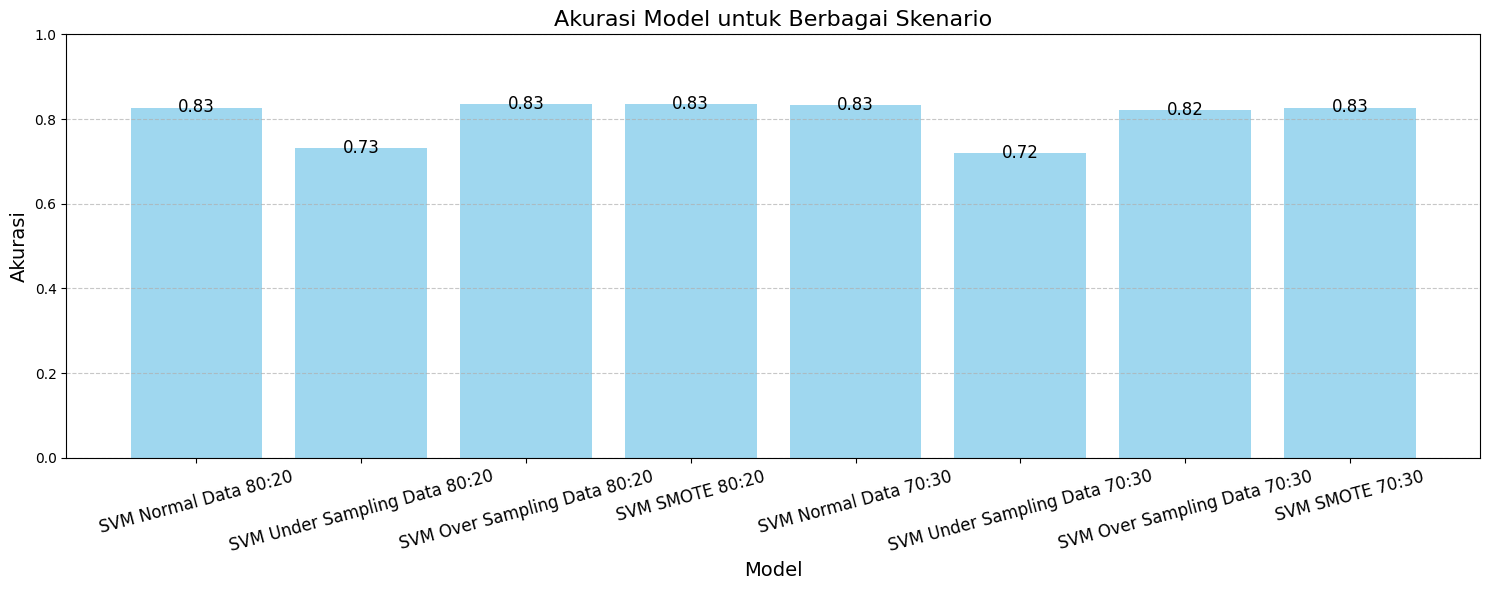

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_scores = {
    "SVM Normal Data 80:20": accuracy_score(test_data_20['final_sentiment'], pred_svm_normal_80),
    "SVM Under Sampling Data 80:20": accuracy_score(test_data_20['final_sentiment'], pred_svm_us_80),
    "SVM Over Sampling Data 80:20": accuracy_score(test_data_20['final_sentiment'], pred_svm_os_80),
    "SVM SMOTE 80:20": accuracy_score(test_data_20['final_sentiment'], pred_svm_smote_80),
    "SVM Normal Data 70:30": accuracy_score(test_data_30['final_sentiment'], pred_svm_normal_70),
    "SVM Under Sampling Data 70:30": accuracy_score(test_data_30['final_sentiment'], pred_svm_us_70),
    "SVM Over Sampling Data 70:30": accuracy_score(test_data_30['final_sentiment'], pred_svm_os_70),
    "SVM SMOTE 70:30": accuracy_score(test_data_30['final_sentiment'], pred_svm_smote_70),
}

# Membuat plot
labels = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(15, 6))
bars = plt.bar(labels, accuracies, color='skyblue', alpha=0.8)

# Menampilkan nilai akurasi di atas tiap batang
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02,
             f"{accuracy:.2f}", ha='center', va='bottom', fontsize=12)

# Menambahkan detail plot
plt.title("Akurasi Model untuk Berbagai Skenario", fontsize=16)
plt.ylabel("Akurasi", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.ylim(0, 1)  # Rentang akurasi antara 0 dan 1
plt.xticks(rotation=15, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

###NB NORMAL DATA 80 20

In [ ]:
# Inisialisasi model Naive Bayes
nb_normal_80 = MultinomialNB()

# Melatih model pada data training
nb_normal_80.fit(tfidf_features_normal_80, train_data_80['final_sentiment'])

# Prediksi pada data test
pred_nb_normal_80 = nb_normal_80.predict(tfidf_features_test_normal_80)

# Evaluasi model
print("Naive Bayes [Normal Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_nb_normal_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_nb_normal_80))

Naive Bayes [Normal Data 80:20]
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        51
     positif       0.79      1.00      0.88       191

    accuracy                           0.79       242
   macro avg       0.39      0.50      0.44       242
weighted avg       0.62      0.79      0.70       242

Akurasi Skenario: 0.7892561983471075


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###NB UNDERSAMPLING 80 20

In [ ]:
# Inisialisasi model Naive Bayes
nb_us_80 = MultinomialNB()

# Melatih model pada data training
nb_us_80.fit(tfidf_features_us_80, train_labels_us_80)

# Prediksi pada data test
pred_nb_us_80 = nb_us_80.predict(tfidf_features_test_us_80)

# Evaluasi model
print("Naive Bayes [Under Sampling Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_nb_us_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_nb_us_80))

Naive Bayes [Under Sampling Data 80:20]
              precision    recall  f1-score   support

     negatif       0.45      0.71      0.55        51
     positif       0.91      0.77      0.83       191

    accuracy                           0.76       242
   macro avg       0.68      0.74      0.69       242
weighted avg       0.81      0.76      0.77       242

Akurasi Skenario: 0.756198347107438


###NB OVERSAMPLING 80 20

In [ ]:
# Inisialisasi model Naive Bayes
nb_os_80 = MultinomialNB()

# Melatih model pada data training
nb_os_80.fit(tfidf_features_os_80, train_labels_os_80)

# Prediksi pada data test
pred_nb_os_80 = nb_os_80.predict(tfidf_features_test_os_80)

# Evaluasi model
print("Naive Bayes [Over Sampling Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_nb_os_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_nb_os_80))

Naive Bayes [Over Sampling Data 80:20]
              precision    recall  f1-score   support

     negatif       0.50      0.65      0.56        51
     positif       0.90      0.83      0.86       191

    accuracy                           0.79       242
   macro avg       0.70      0.74      0.71       242
weighted avg       0.81      0.79      0.80       242

Akurasi Skenario: 0.7892561983471075


###NB NORMAL DATA 70 30

In [ ]:
# Inisialisasi model Naive Bayes
nb_normal_70 = MultinomialNB()

# Melatih model pada data training
nb_normal_70.fit(tfidf_features_normal_70, train_data_70['final_sentiment'])

# Prediksi pada data test
pred_nb_normal_70 = nb_normal_70.predict(tfidf_features_test_normal_70)

# Evaluasi model
print("Naive Bayes [Normal Data 70:30]")
print(classification_report(test_data_30['final_sentiment'], pred_nb_normal_70))
print("Akurasi Skenario:", accuracy_score(test_data_30['final_sentiment'], pred_nb_normal_70))

Naive Bayes [Normal Data 70:30]
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        77
     positif       0.79      1.00      0.88       286

    accuracy                           0.79       363
   macro avg       0.39      0.50      0.44       363
weighted avg       0.62      0.79      0.69       363

Akurasi Skenario: 0.7878787878787878


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###NB UNDERSAMPLING 70 30

In [ ]:
# Inisialisasi model Naive Bayes
nb_us_70 = MultinomialNB()

# Melatih model pada data training
nb_us_70.fit(tfidf_features_us_70, train_labels_us_70)

# Prediksi pada data test
pred_nb_us_70 = nb_us_70.predict(tfidf_features_test_us_70)

# Evaluasi model
print("Naive Bayes [Under Sampling Data 70:30]")
print(classification_report(test_data_30['final_sentiment'], pred_nb_us_70))
print("Akurasi Skenario:", accuracy_score(test_data_30['final_sentiment'], pred_nb_us_70))

Naive Bayes [Under Sampling Data 70:30]
              precision    recall  f1-score   support

     negatif       0.42      0.68      0.52        77
     positif       0.90      0.75      0.82       286

    accuracy                           0.73       363
   macro avg       0.66      0.71      0.67       363
weighted avg       0.79      0.73      0.75       363

Akurasi Skenario: 0.7327823691460055


###NB OVERSAMPLING 70 30

In [ ]:
# Inisialisasi model Naive Bayes
nb_os_70 = MultinomialNB()

# Melatih model pada data training
nb_os_70.fit(tfidf_features_os_70, train_labels_os_70)

# Prediksi pada data test
pred_nb_os_70 = nb_os_70.predict(tfidf_features_test_os_70)

# Evaluasi model
print("Naive Bayes [Over Sampling Data 70:30]")
print(classification_report(test_data_30['final_sentiment'], pred_nb_os_70))
print("Akurasi Skenario:", accuracy_score(test_data_30['final_sentiment'], pred_nb_os_70))

Naive Bayes [Over Sampling Data 70:30]
              precision    recall  f1-score   support

     negatif       0.51      0.64      0.56        77
     positif       0.89      0.83      0.86       286

    accuracy                           0.79       363
   macro avg       0.70      0.73      0.71       363
weighted avg       0.81      0.79      0.80       363

Akurasi Skenario: 0.790633608815427


###NB SMOTE 80 20

In [ ]:
# Inisialisasi model Naive Bayes
nb_smote_80 = MultinomialNB()

# Melatih model pada data training
nb_smote_80.fit(tfidf_features_smote_80, labels_smote_80)

# Prediksi pada data test
pred_nb_smote_80 = nb_smote_80.predict(tfidf_features_test_normal_80)

# Evaluasi model
print("Naive Bayes [SMOTE Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_nb_smote_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_nb_smote_80))

Naive Bayes [SMOTE Data 80:20]
              precision    recall  f1-score   support

     negatif       0.50      0.67      0.57        51
     positif       0.90      0.82      0.86       191

    accuracy                           0.79       242
   macro avg       0.70      0.74      0.72       242
weighted avg       0.82      0.79      0.80       242

Akurasi Skenario: 0.7892561983471075


###NB SMOTE 70 30

In [ ]:
# Inisialisasi model Naive Bayes
nb_smote_70 = MultinomialNB()

# Melatih model pada data training
nb_smote_70.fit(tfidf_features_smote_70, labels_smote_70)

# Prediksi pada data test
pred_nb_smote_70 = nb_smote_70.predict(tfidf_features_test_normal_70)

# Evaluasi model
print("Naive Bayes [SMOTE Data 70:30]")
print(classification_report(test_data_30['final_sentiment'], pred_nb_smote_70))
print("Akurasi Skenario:", accuracy_score(test_data_30['final_sentiment'], pred_nb_smote_70))

Naive Bayes [SMOTE Data 70:30]
              precision    recall  f1-score   support

     negatif       0.50      0.68      0.57        77
     positif       0.90      0.82      0.86       286

    accuracy                           0.79       363
   macro avg       0.70      0.75      0.72       363
weighted avg       0.82      0.79      0.80       363

Akurasi Skenario: 0.7878787878787878


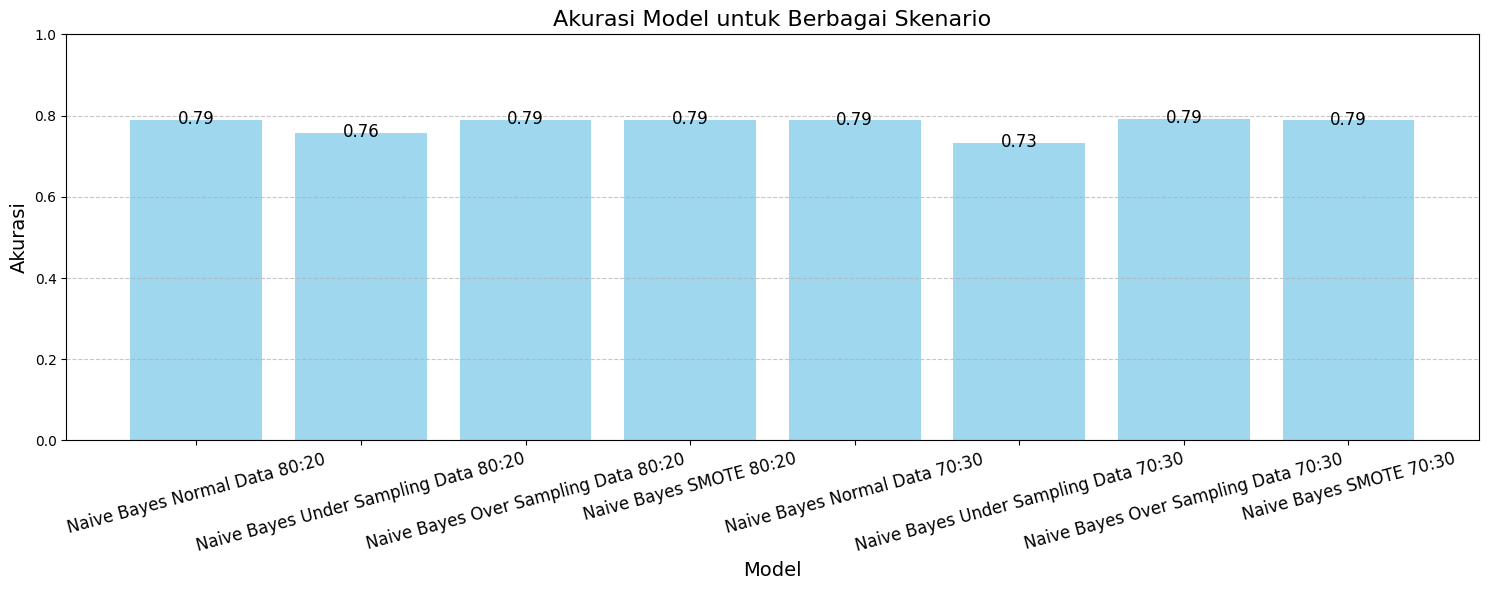

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_scores = {
    "Naive Bayes Normal Data 80:20": accuracy_score(test_data_20['final_sentiment'], pred_nb_normal_80),
    "Naive Bayes Under Sampling Data 80:20": accuracy_score(test_data_20['final_sentiment'], pred_nb_us_80),
    "Naive Bayes Over Sampling Data 80:20": accuracy_score(test_data_20['final_sentiment'], pred_nb_os_80),
    "Naive Bayes SMOTE 80:20": accuracy_score(test_data_20['final_sentiment'], pred_nb_smote_80),
    "Naive Bayes Normal Data 70:30": accuracy_score(test_data_30['final_sentiment'], pred_nb_normal_70),
    "Naive Bayes Under Sampling Data 70:30": accuracy_score(test_data_30['final_sentiment'], pred_nb_us_70),
    "Naive Bayes Over Sampling Data 70:30": accuracy_score(test_data_30['final_sentiment'], pred_nb_os_70),
    "Naive Bayes SMOTE 70:30": accuracy_score(test_data_30['final_sentiment'], pred_nb_smote_70),
}

# Membuat plot
labels = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(15, 6))
bars = plt.bar(labels, accuracies, color='skyblue', alpha=0.8)

# Menampilkan nilai akurasi di atas tiap batang
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02,
             f"{accuracy:.2f}", ha='center', va='bottom', fontsize=12)

# Menambahkan detail plot
plt.title("Akurasi Model untuk Berbagai Skenario", fontsize=16)
plt.ylabel("Akurasi", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.ylim(0, 1)  # Rentang akurasi antara 0 dan 1
plt.xticks(rotation=15, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

##Random Forest (Hapus)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Inisialisasi model Random Forest
rf_normal_80 = RandomForestClassifier(random_state=42)

# Melatih model pada data training
rf_normal_80.fit(tfidf_features_normal_80, train_data_80['final_sentiment'])

# Prediksi pada data test
pred_rf_normal_80 = rf_normal_80.predict(tfidf_features_test_normal_80)

# Evaluasi model
print("Random Forest [Normal Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_rf_normal_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_rf_normal_80))

Random Forest [Normal Data 80:20]
              precision    recall  f1-score   support

     negatif       0.62      0.25      0.36        51
     positif       0.83      0.96      0.89       191

    accuracy                           0.81       242
   macro avg       0.72      0.61      0.62       242
weighted avg       0.78      0.81      0.78       242

Akurasi Skenario: 0.8099173553719008


In [ ]:
# Inisialisasi model Random Forest
rf_us_80 = RandomForestClassifier(random_state=42)

# Melatih model pada data training
rf_us_80.fit(tfidf_features_us_80, train_labels_us_80)

# Prediksi pada data test
pred_rf_us_80 = rf_us_80.predict(tfidf_features_test_us_80)

# Evaluasi model
print("Random Forest [Under Sampling Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_rf_us_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_rf_us_80))


Random Forest [Under Sampling Data 80:20]
              precision    recall  f1-score   support

     negatif       0.34      0.80      0.47        51
     positif       0.92      0.58      0.71       191

    accuracy                           0.62       242
   macro avg       0.63      0.69      0.59       242
weighted avg       0.79      0.62      0.66       242

Akurasi Skenario: 0.6239669421487604


In [ ]:
# Inisialisasi model Random Forest
rf_os_80 = RandomForestClassifier(random_state=42)

# Melatih model pada data training
rf_os_80.fit(tfidf_features_os_80, train_labels_os_80)

# Prediksi pada data test
pred_rf_os_80 = rf_os_80.predict(tfidf_features_test_os_80)

# Evaluasi model
print("Random Forest [Over Sampling Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_rf_os_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_rf_os_80))

Random Forest [Over Sampling Data 80:20]
              precision    recall  f1-score   support

     negatif       0.64      0.35      0.46        51
     positif       0.85      0.95      0.89       191

    accuracy                           0.82       242
   macro avg       0.74      0.65      0.67       242
weighted avg       0.80      0.82      0.80       242

Akurasi Skenario: 0.8223140495867769


##Logistic Regression (Hapus)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Inisialisasi model Logistic Regression
lr_normal_80 = LogisticRegression(random_state=42, max_iter=1000)

# Melatih model pada data training
lr_normal_80.fit(tfidf_features_normal_80, train_data_80['final_sentiment'])

# Prediksi pada data test
pred_lr_normal_80 = lr_normal_80.predict(tfidf_features_test_normal_80)

# Evaluasi model
print("Logistic Regression [Normal Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_lr_normal_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_lr_normal_80))


Logistic Regression [Normal Data 80:20]
              precision    recall  f1-score   support

     negatif       0.57      0.08      0.14        51
     positif       0.80      0.98      0.88       191

    accuracy                           0.79       242
   macro avg       0.69      0.53      0.51       242
weighted avg       0.75      0.79      0.73       242

Akurasi Skenario: 0.7933884297520661


In [ ]:
# Inisialisasi model Logistic Regression
lr_us_80 = LogisticRegression(random_state=42, max_iter=1000)

# Melatih model pada data training
lr_us_80.fit(tfidf_features_us_80, train_labels_us_80)

# Prediksi pada data test
pred_lr_us_80 = lr_us_80.predict(tfidf_features_test_us_80)

# Evaluasi model
print("Logistic Regression [Under Sampling Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_lr_us_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_lr_us_80))


Logistic Regression [Under Sampling Data 80:20]
              precision    recall  f1-score   support

     negatif       0.41      0.78      0.54        51
     positif       0.92      0.70      0.80       191

    accuracy                           0.72       242
   macro avg       0.67      0.74      0.67       242
weighted avg       0.82      0.72      0.74       242

Akurasi Skenario: 0.71900826446281


In [ ]:
# Inisialisasi model Logistic Regression
lr_os_80 = LogisticRegression(random_state=42, max_iter=1000)

# Melatih model pada data training
lr_os_80.fit(tfidf_features_os_80, train_labels_os_80)

# Prediksi pada data test
pred_lr_os_80 = lr_os_80.predict(tfidf_features_test_os_80)

# Evaluasi model
print("Logistic Regression [Over Sampling Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_lr_os_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_lr_os_80))


Logistic Regression [Over Sampling Data 80:20]
              precision    recall  f1-score   support

     negatif       0.64      0.53      0.58        51
     positif       0.88      0.92      0.90       191

    accuracy                           0.84       242
   macro avg       0.76      0.73      0.74       242
weighted avg       0.83      0.84      0.83       242

Akurasi Skenario: 0.8388429752066116


##Polynomial Kernel (Hapus)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Inisialisasi model SVM dengan kernel polinomial
svm_poly_normal_80 = SVC(kernel='poly', degree=3, random_state=42)

# Melatih model pada data training
svm_poly_normal_80.fit(tfidf_features_normal_80, train_data_80['final_sentiment'])

# Prediksi pada data test
pred_svm_poly_normal_80 = svm_poly_normal_80.predict(tfidf_features_test_normal_80)

# Evaluasi model
print("SVM Polynomial Kernel [Normal Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_svm_poly_normal_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_svm_poly_normal_80))


SVM Polynomial Kernel [Normal Data 80:20]
              precision    recall  f1-score   support

     negatif       0.50      0.02      0.04        51
     positif       0.79      0.99      0.88       191

    accuracy                           0.79       242
   macro avg       0.65      0.51      0.46       242
weighted avg       0.73      0.79      0.70       242

Akurasi Skenario: 0.7892561983471075


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model SVM dengan kernel polinomial
svm_poly_us_80 = SVC(kernel='poly', degree=3, random_state=42)

# Melatih model pada data training
svm_poly_us_80.fit(tfidf_features_us_80, train_labels_us_80)

# Prediksi pada data test
pred_svm_poly_us_80 = svm_poly_us_80.predict(tfidf_features_test_us_80)

# Evaluasi model
print("SVM Polynomial Kernel [Under Sampling Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_svm_poly_us_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_svm_poly_us_80))

SVM Polynomial Kernel [Under Sampling Data 80:20]
              precision    recall  f1-score   support

       equal       0.05      0.44      0.09        16
     negatif       0.21      0.34      0.26        50
      netral       0.57      0.35      0.43       185
     positif       0.69      0.39      0.49       192

    accuracy                           0.37       443
   macro avg       0.38      0.38      0.32       443
weighted avg       0.56      0.37      0.43       443

Akurasi Skenario: 0.36794582392776526


In [ ]:
# Inisialisasi model SVM dengan kernel polinomial
svm_poly_os_80 = SVC(kernel='poly', degree=3, random_state=42)

# Melatih model pada data training
svm_poly_os_80.fit(tfidf_features_os_80, train_labels_os_80)

# Prediksi pada data test
pred_svm_poly_os_80 = svm_poly_os_80.predict(tfidf_features_test_os_80)

# Evaluasi model
print("SVM Polynomial Kernel [Over Sampling Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_svm_poly_os_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_svm_poly_os_80))


SVM Polynomial Kernel [Over Sampling Data 80:20]
              precision    recall  f1-score   support

       equal       0.00      0.00      0.00        16
     negatif       0.60      0.06      0.11        50
      netral       0.68      0.54      0.60       185
     positif       0.57      0.84      0.68       192

    accuracy                           0.60       443
   macro avg       0.46      0.36      0.35       443
weighted avg       0.60      0.60      0.56       443

Akurasi Skenario: 0.5981941309255079


##Decision Tree (Hapus)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Inisialisasi model Decision Tree
dt_normal_80 = DecisionTreeClassifier(random_state=42)

# Melatih model pada data training
dt_normal_80.fit(tfidf_features_normal_80, train_data_80['final_sentiment'])

# Prediksi pada data test
pred_dt_normal_80 = dt_normal_80.predict(tfidf_features_test_normal_80)

# Evaluasi model
print("Decision Tree [Normal Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_dt_normal_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_dt_normal_80))


Decision Tree [Normal Data 80:20]
              precision    recall  f1-score   support

       equal       0.00      0.00      0.00        16
     negatif       0.26      0.24      0.25        50
      netral       0.64      0.76      0.70       185
     positif       0.70      0.62      0.66       192

    accuracy                           0.62       443
   macro avg       0.40      0.41      0.40       443
weighted avg       0.60      0.62      0.60       443

Akurasi Skenario: 0.6162528216704289


In [ ]:
# Inisialisasi model Decision Tree
dt_us_80 = DecisionTreeClassifier(random_state=42)

# Melatih model pada data training
dt_us_80.fit(tfidf_features_us_80, train_labels_us_80)

# Prediksi pada data test
pred_dt_us_80 = dt_us_80.predict(tfidf_features_test_us_80)

# Evaluasi model
print("Decision Tree [Under Sampling Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_dt_us_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_dt_us_80))

Decision Tree [Under Sampling Data 80:20]
              precision    recall  f1-score   support

       equal       0.08      0.38      0.14        16
     negatif       0.15      0.14      0.14        50
      netral       0.54      0.75      0.63       185
     positif       0.74      0.26      0.38       192

    accuracy                           0.45       443
   macro avg       0.38      0.38      0.32       443
weighted avg       0.56      0.45      0.45       443

Akurasi Skenario: 0.45372460496614


In [ ]:
# Inisialisasi model Decision Tree
dt_os_80 = DecisionTreeClassifier(random_state=42)

# Melatih model pada data training
dt_os_80.fit(tfidf_features_os_80, train_labels_os_80)

# Prediksi pada data test
pred_dt_os_80 = dt_os_80.predict(tfidf_features_test_os_80)

# Evaluasi model
print("Decision Tree [Over Sampling Data 80:20]")
print(classification_report(test_data_20['final_sentiment'], pred_dt_os_80))
print("Akurasi Skenario:", accuracy_score(test_data_20['final_sentiment'], pred_dt_os_80))

Decision Tree [Over Sampling Data 80:20]
              precision    recall  f1-score   support

       equal       0.00      0.00      0.00        16
     negatif       0.21      0.24      0.22        50
      netral       0.62      0.69      0.65       185
     positif       0.70      0.49      0.58       192

    accuracy                           0.53       443
   macro avg       0.38      0.36      0.36       443
weighted avg       0.59      0.53      0.55       443

Akurasi Skenario: 0.5304740406320542


#Perbandingan Akurasi Berbagai Skenario

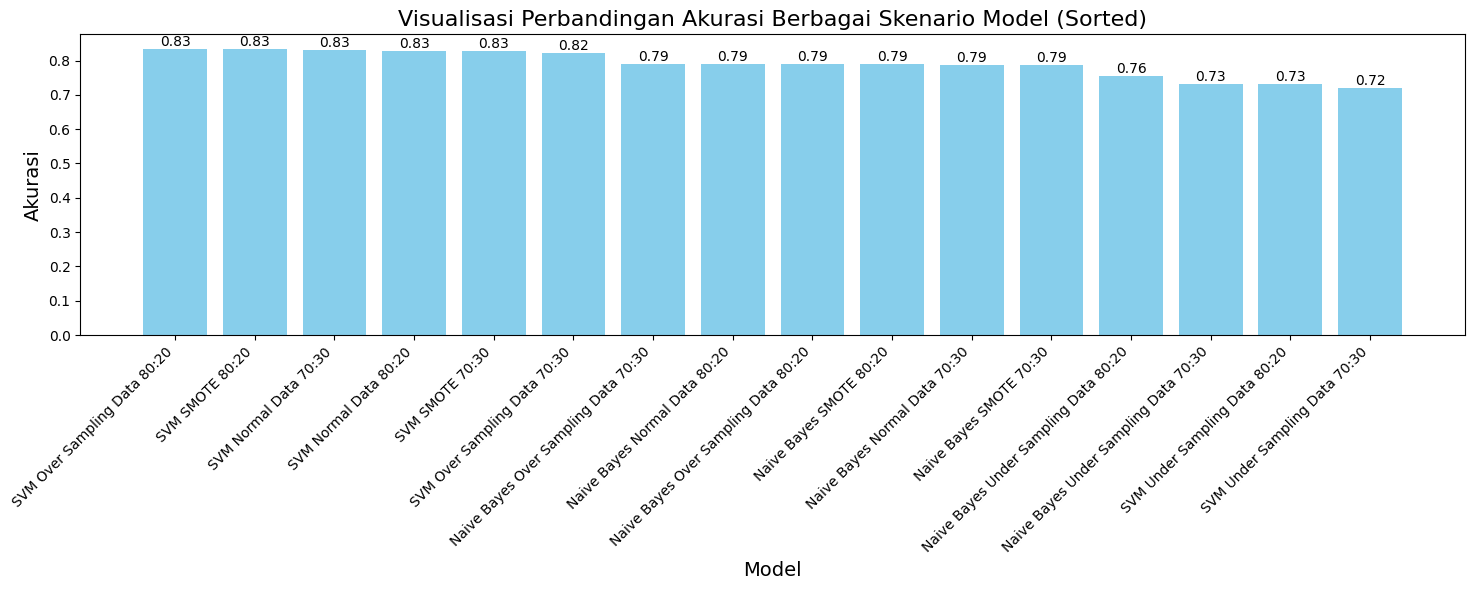

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
bars = plt.bar(df_sorted['Model'], df_sorted['Akurasi'], color='skyblue')

# Menampilkan nilai akurasi
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xlabel("Model", fontsize=14)
plt.ylabel("Akurasi", fontsize=14)
plt.title("Visualisasi Perbandingan Akurasi Berbagai Skenario Model (Sorted)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
data = {
    'Model': ['SVM Normal Data 80:20', 'SVM Under Sampling Data 80:20', 'SVM Over Sampling Data 80:20', 'SVM SMOTE 80:20',
              'SVM Normal Data 70:30', 'SVM Under Sampling Data 70:30', 'SVM Over Sampling Data 70:30', 'SVM SMOTE 70:30',
              'Naive Bayes Normal Data 80:20', 'Naive Bayes Under Sampling Data 80:20', 'Naive Bayes Over Sampling Data 80:20', 'Naive Bayes SMOTE 80:20',
              'Naive Bayes Normal Data 70:30', 'Naive Bayes Under Sampling Data 70:30', 'Naive Bayes Over Sampling Data 70:30', 'Naive Bayes SMOTE 70:30'],
    'Akurasi': [accuracy_score(test_data_20['final_sentiment'], pred_svm_normal_80),
                accuracy_score(test_data_20['final_sentiment'], pred_svm_us_80),
                accuracy_score(test_data_20['final_sentiment'], pred_svm_os_80),
                accuracy_score(test_data_20['final_sentiment'], pred_svm_smote_80),
                accuracy_score(test_data_30['final_sentiment'], pred_svm_normal_70),
                accuracy_score(test_data_30['final_sentiment'], pred_svm_us_70),
                accuracy_score(test_data_30['final_sentiment'], pred_svm_os_70),
                accuracy_score(test_data_30['final_sentiment'], pred_svm_smote_70),
                accuracy_score(test_data_20['final_sentiment'], pred_nb_normal_80),
                accuracy_score(test_data_20['final_sentiment'], pred_nb_us_80),
                accuracy_score(test_data_20['final_sentiment'], pred_nb_os_80),
                accuracy_score(test_data_20['final_sentiment'], pred_nb_smote_80),
                accuracy_score(test_data_30['final_sentiment'], pred_nb_normal_70),
                accuracy_score(test_data_30['final_sentiment'], pred_nb_us_70),
                accuracy_score(test_data_30['final_sentiment'], pred_nb_os_70),
                accuracy_score(test_data_30['final_sentiment'], pred_nb_smote_70)]
}

df = pd.DataFrame(data)
df_sorted = df.sort_values(by='Akurasi', ascending=False)
df_sorted


,Model,Akurasi
2,SVM Over Sampling Data 80:20,0.834711
3,SVM SMOTE 80:20,0.834711
4,SVM Normal Data 70:30,0.831956
0,SVM Normal Data 80:20,0.826446
7,SVM SMOTE 70:30,0.826446
6,SVM Over Sampling Data 70:30,0.820937
14,Naive Bayes Over Sampling Data 70:30,0.790634
8,Naive Bayes Normal Data 80:20,0.789256
10,Naive Bayes Over Sampling Data 80:20,0.789256
11,Naive Bayes SMOTE 80:20,0.789256


##PICKLE

In [ ]:
import pickle

# Simpan TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as tfidf_file:
       pickle.dump(tfidf_vectorizer_os_80, tfidf_file)

# Simpan Model SVM
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_os_80, model_file)

print("TF-IDF vectorizer and SVM model saved")

TF-IDF vectorizer and SVM model saved


In [ ]:
# Load TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as tfidf_file:
    tfidf_vectorizer = pickle.load(tfidf_file)

# Load Model SVM
with open('svm_model.pkl', 'rb') as model_file:
    svm_model = pickle.load(model_file)

print("TF-IDF vectorizer and SVM model mounted")

# Contoh Prediksi
text_input = ["Program ini sangat baik bagi negara!"]

# Transformasi teks dengan TF-IDF
text_features = tfidf_vectorizer.transform(text_input)

# Prediksi sentimen
sentiment_prediction = svm_model.predict(text_features)
print(f"Sentimen: {sentiment_prediction[0]}")

TF-IDF vectorizer and SVM model mounted
Sentimen: positif


In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
import re
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Load pickle files (TF-IDF vectorizer and SVM model)
with open('tfidf_vectorizer.pkl', 'rb') as tfidf_file:
    tfidf_vectorizer = pickle.load(tfidf_file)

with open('svm_model.pkl', 'rb') as model_file:
    svm_model = pickle.load(model_file)

# Load stopwords and stemmer
stopword_factory = StopWordRemoverFactory()
stopwords = set(stopword_factory.get_stop_words())
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# Function for preprocessing text
def preprocess_text(text):
    # Remove mentions, hashtags, extra whitespace
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    # Case folding
    text = text.lower()

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])

    # Stemming
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    return text

#UI
st.title("Sentiment Analysis Application")
st.write("Enter text or upload a CSV file for sentiment analysis (positive or negative).")

# Tab navigation: Single Text Input or File Upload
option = st.radio("Select input mode:", ("Text", "Upload CSV File"))

#Single Text Input
if option == "Single Text":
    user_input = st.text_area("Enter Text", placeholder="Type your text here...")

    if st.button("Analyze Sentiment"):
        if user_input:
            # Preprocess text
            preprocessed_text = preprocess_text(user_input)

            # Extract features using TF-IDF
            features = tfidf_vectorizer.transform([preprocessed_text])

            # Predict sentiment
            prediction = svm_model.predict(features)[0]

            # Display result
            if prediction == 'positif':
                st.success("Result: Positive Sentiment")
            elif prediction == 'negatif':
                st.error("Result: Negative Sentiment")
        else:
            st.warning("Please enter some text to analyze!")


#File Upload
elif option == "Upload CSV File":
    uploaded_file = st.file_uploader("Upload a CSV file", type=["csv"])

    if uploaded_file is not None:
        try:
            # Check file size (limit 50 MB)
            if uploaded_file.size > 50 * 1024 * 1024:
                st.error("File is too large! Please upload a file smaller than 50 MB.")
            else:
                # Load CSV file
                df = pd.read_csv(uploaded_file)
                st.write("Uploaded data:")
                st.dataframe(df.head())

                # Validate column
                text_column = st.selectbox("Select text column:", df.columns)
                if st.button("Analyze CSV Sentiment"):
                    # Preprocess all texts
                    df['preprocessed_text'] = df[text_column].astype(str).apply(preprocess_text)

                    # Extract features using TF-IDF
                    features = tfidf_vectorizer.transform(df['preprocessed_text'])

                    # Predict sentiments
                    df['sentiment'] = svm_model.predict(features)

                    # Display results
                    st.success("Analysis complete! Here are the results:")
                    st.dataframe(df[[text_column, 'sentiment']])

                    # Visualize results with a pie chart
                    sentiment_counts = df['sentiment'].value_counts()
                    fig, ax = plt.subplots()
                    ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
                    ax.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
                    st.pyplot(fig)

                    # Download results as CSV
                    csv = df.to_csv(index=False)
                    st.download_button(
                        label="Download Results as CSV",
                        data=csv,
                        file_name="sentiment_results.csv",
                        mime="text/csv"
                    )
        except Exception as e:
            st.error(f"An error occurred: {e}")


Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.16.130.95


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.130.95:8501

⠴⠦your url is: https://mean-lights-drive.loca.lt
  Stopping...
^C
